<a href="https://colab.research.google.com/github/stho382/ENGSCI_Group_6_OR/blob/main/OR_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary packages and data

In [1]:
!pip3 install openrouteservice
!pip3 install python-dotenv
!pip3 install plotnine
!pip3 install folium

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine
import folium
%matplotlib inline

In [3]:
demands_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsDemands.csv')
distances_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsDistances.csv')
locations_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsLocations.csv')
travel_durations_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/WoolworthsTravelDurations.csv')
locationsSouth_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationSouthRegion.csv')
locationsEast_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationEastRegion.csv')
locationsNorth_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationNorthRegion.csv')
locationsWest_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationWestRegion.csv')
locationsCentralNorth_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationCentralNorth.csv')
locationsCentralSouth_df = pd.read_csv('https://raw.githubusercontent.com/stho382/ENGSCI_Group_6_OR/main/data/LocationCentralSouth.csv')

In [4]:
demands_df

,Store,14/06/21,15/06/21,16/06/21,17/06/21,18/06/21,19/06/21,20/06/21,21/06/21,22/06/21,...,2/07/21,3/07/21,4/07/21,5/07/21,6/07/21,7/07/21,8/07/21,9/07/21,10/07/21,11/07/21
0,Countdown Airport,5,6,10,11,7,5,0,7,8,...,7,6,0,8,6,8,9,7,3,0
1,Countdown Auckland City,6,8,5,8,8,2,0,8,8,...,6,3,0,11,7,7,9,5,5,0
2,Countdown Aviemore Drive,9,9,8,7,14,4,0,6,10,...,10,6,0,7,9,4,6,9,2,0
3,Countdown Birkenhead,9,4,8,10,7,5,0,5,6,...,7,6,0,9,9,5,4,12,4,0
4,Countdown Blockhouse Bay,6,8,7,6,6,2,0,9,4,...,7,3,0,8,8,4,10,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SuperValue Avondale,3,2,6,6,4,0,0,3,8,...,5,0,0,5,5,5,5,5,0,0
61,SuperValue Flatbush,6,7,4,3,5,0,0,4,6,...,3,0,0,5,4,5,4,3,0,0
62,SuperValue Palomino,4,2,2,6,3,0,0,7,6,...,5,0,0,5,5,5,7,7,0,0
63,SuperValue Papakura,4,6,4,5,5,0,0,7,4,...,6,0,0,6,6,6,3,6,0,0


In [5]:
# Checking if each store entered in unique
demands_df['Store'].is_unique

True

In [6]:
# Converting the stores into the index
demands_df.set_index("Store", inplace = True)
demands_df

,14/06/21,15/06/21,16/06/21,17/06/21,18/06/21,19/06/21,20/06/21,21/06/21,22/06/21,23/06/21,...,2/07/21,3/07/21,4/07/21,5/07/21,6/07/21,7/07/21,8/07/21,9/07/21,10/07/21,11/07/21
Store,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,5,6,10,11,7,5,0,7,8,5,...,7,6,0,8,6,8,9,7,3,0
Countdown Auckland City,6,8,5,8,8,2,0,8,8,13,...,6,3,0,11,7,7,9,5,5,0
Countdown Aviemore Drive,9,9,8,7,14,4,0,6,10,6,...,10,6,0,7,9,4,6,9,2,0
Countdown Birkenhead,9,4,8,10,7,5,0,5,6,12,...,7,6,0,9,9,5,4,12,4,0
Countdown Blockhouse Bay,6,8,7,6,6,2,0,9,4,8,...,7,3,0,8,8,4,10,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SuperValue Avondale,3,2,6,6,4,0,0,3,8,5,...,5,0,0,5,5,5,5,5,0,0
SuperValue Flatbush,6,7,4,3,5,0,0,4,6,4,...,3,0,0,5,4,5,4,3,0,0
SuperValue Palomino,4,2,2,6,3,0,0,7,6,6,...,5,0,0,5,5,5,7,7,0,0


In [7]:
distances_df

,Unnamed: 0,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,...,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
0,Countdown Airport,0.00,27376.70,22848.24,32893.50,18711.81,17010.24,45058.13,38153.57,17189.17,...,24180.02,24538.72,7522.97,11830.65,30136.89,17975.54,11664.92,31348.46,22073.37,23907.27
1,Countdown Auckland City,27439.56,0.00,19474.76,8880.88,16477.28,19408.25,21045.52,14140.95,7596.66,...,16889.68,21165.24,20841.44,16559.38,19344.86,11457.54,22647.23,20556.42,34219.06,21672.74
2,Countdown Aviemore Drive,26158.92,19344.59,0.00,26130.53,30918.25,4125.45,38295.16,31390.60,13275.08,...,31330.65,2867.77,15459.00,10856.87,33785.84,25898.52,9807.31,34997.40,24548.54,36113.71
3,Countdown Birkenhead,33332.25,9420.07,26589.73,0.00,22369.97,26523.22,17128.73,3659.91,14711.63,...,22782.37,28280.21,26734.13,23674.35,25237.56,17350.24,29762.20,26449.12,41334.03,27565.43
4,Countdown Blockhouse Bay,18693.60,16198.47,30924.72,21715.26,0.00,31204.03,33879.89,26975.33,19046.62,...,6185.80,32615.20,12095.48,17856.91,18958.66,3260.90,25858.71,20170.22,35611.80,5031.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,SuperValue Avondale,17946.89,12222.41,26948.66,17739.20,3234.50,26882.15,29903.84,22999.27,15070.56,...,6399.51,28639.14,11348.77,17110.20,14384.92,0.00,25112.00,15596.48,34865.09,7961.20
62,SuperValue Flatbush,16893.51,22608.09,9822.76,29394.02,26523.29,5816.55,41558.66,34654.09,16538.58,...,31991.50,12522.17,15334.45,9500.49,37049.34,25787.02,0.00,38260.90,15283.13,31718.75
63,SuperValue Palomino,31962.32,20828.25,35554.50,26345.04,12833.79,35487.99,28916.91,27873.53,23676.40,...,6279.50,37244.98,25364.20,32639.12,3515.93,11623.10,38726.97,0.00,50298.80,10201.58
64,SuperValue Papakura,26296.36,34426.30,28402.45,41212.24,35926.13,23576.62,53376.88,46472.31,28356.80,...,41394.34,30092.93,24737.29,21318.70,48867.55,35189.87,15929.52,50079.11,0.00,41121.59


In [8]:
# Checking if the values in in the first column are unique
distances_df['Unnamed: 0'].is_unique

True

In [9]:
# Changing the first column to an index and replacing its name to 'Store'
distances_df.set_index("Unnamed: 0", inplace = True)
distances_df.index.name = 'Store'
distances_df

,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,...,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
Store,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,0.00,27376.70,22848.24,32893.50,18711.81,17010.24,45058.13,38153.57,17189.17,24015.25,...,24180.02,24538.72,7522.97,11830.65,30136.89,17975.54,11664.92,31348.46,22073.37,23907.27
Countdown Auckland City,27439.56,0.00,19474.76,8880.88,16477.28,19408.25,21045.52,14140.95,7596.66,4600.53,...,16889.68,21165.24,20841.44,16559.38,19344.86,11457.54,22647.23,20556.42,34219.06,21672.74
Countdown Aviemore Drive,26158.92,19344.59,0.00,26130.53,30918.25,4125.45,38295.16,31390.60,13275.08,21327.36,...,31330.65,2867.77,15459.00,10856.87,33785.84,25898.52,9807.31,34997.40,24548.54,36113.71
Countdown Birkenhead,33332.25,9420.07,26589.73,0.00,22369.97,26523.22,17128.73,3659.91,14711.63,8423.66,...,22782.37,28280.21,26734.13,23674.35,25237.56,17350.24,29762.20,26449.12,41334.03,27565.43
Countdown Blockhouse Bay,18693.60,16198.47,30924.72,21715.26,0.00,31204.03,33879.89,26975.33,19046.62,12837.01,...,6185.80,32615.20,12095.48,17856.91,18958.66,3260.90,25858.71,20170.22,35611.80,5031.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SuperValue Avondale,17946.89,12222.41,26948.66,17739.20,3234.50,26882.15,29903.84,22999.27,15070.56,8860.95,...,6399.51,28639.14,11348.77,17110.20,14384.92,0.00,25112.00,15596.48,34865.09,7961.20
SuperValue Flatbush,16893.51,22608.09,9822.76,29394.02,26523.29,5816.55,41558.66,34654.09,16538.58,24590.86,...,31991.50,12522.17,15334.45,9500.49,37049.34,25787.02,0.00,38260.90,15283.13,31718.75
SuperValue Palomino,31962.32,20828.25,35554.50,26345.04,12833.79,35487.99,28916.91,27873.53,23676.40,17466.80,...,6279.50,37244.98,25364.20,32639.12,3515.93,11623.10,38726.97,0.00,50298.80,10201.58


In [10]:
locations_df

,Type,Location,Store,Lat,Long
0,Countdown,Airport,Countdown Airport,-36.997370,174.788882
1,Countdown,Auckland City,Countdown Auckland City,-36.844962,174.773119
2,Countdown,Aviemore Drive,Countdown Aviemore Drive,-36.898878,174.906570
3,Countdown,Birkenhead,Countdown Birkenhead,-36.811118,174.724878
4,Countdown,Blockhouse Bay,Countdown Blockhouse Bay,-36.922919,174.702352
...,...,...,...,...,...
61,SuperValue,Avondale,SuperValue Avondale,-36.897769,174.697410
62,SuperValue,Flatbush,SuperValue Flatbush,-36.976767,174.897227
63,SuperValue,Palomino,SuperValue Palomino,-36.882876,174.616179
64,SuperValue,Papakura,SuperValue Papakura,-37.066063,174.955698


In [11]:
# Checking if the values in in the first column are unique
locations_df['Store'].is_unique

True

In [12]:
# Setting the 'Store column to be the index
locations_df.set_index('Store', inplace=True)
locations_df

,Type,Location,Lat,Long
Store,,,,
Countdown Airport,Countdown,Airport,-36.997370,174.788882
Countdown Auckland City,Countdown,Auckland City,-36.844962,174.773119
Countdown Aviemore Drive,Countdown,Aviemore Drive,-36.898878,174.906570
Countdown Birkenhead,Countdown,Birkenhead,-36.811118,174.724878
Countdown Blockhouse Bay,Countdown,Blockhouse Bay,-36.922919,174.702352
...,...,...,...,...
SuperValue Avondale,SuperValue,Avondale,-36.897769,174.697410
SuperValue Flatbush,SuperValue,Flatbush,-36.976767,174.897227
SuperValue Palomino,SuperValue,Palomino,-36.882876,174.616179


In [13]:
locationsSouth_df

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,SuperValue,Papakura,SuperValue Papakura,-37.066063,174.955698,5.0,5.0,5.0,4.0,5.5,0.0,0
1,Countdown,Papakura,Countdown Papakura,-37.063905,174.944724,7.5,7.0,6.5,7.0,6.0,4.5,0
2,Countdown,Roselands,Countdown Roselands,-37.058948,174.941430,7.5,9.5,9.0,8.5,8.0,5.0,0
3,Countdown,Takanini,Countdown Takanini,-37.047643,174.927924,7.0,9.5,9.0,7.5,9.0,5.0,0
4,Countdown,Manurewa,Countdown Manurewa,-37.017344,174.865110,8.0,8.0,7.0,8.0,9.5,3.0,0
5,Countdown,Airport,Countdown Airport,-36.997370,174.788882,6.5,7.0,6.5,8.5,7.0,5.0,0
6,Countdown,Manukau Mall,Countdown Manukau Mall,-36.991750,174.883193,8.0,10.5,9.0,6.0,8.5,4.0,0
7,Countdown,Manukau,Countdown Manukau,-36.986769,174.884815,6.0,9.0,8.5,6.5,8.0,6.0,0
8,SuperValue,Flatbush,SuperValue Flatbush,-36.976767,174.897227,5.5,5.5,4.0,3.5,4.0,0.0,0
9,Countdown,Papatoetoe,Countdown Papatoetoe,-36.970395,174.862111,8.0,11.0,8.0,11.0,7.0,2.5,0


In [14]:
locationsEast_df

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,FreshChoice,Otahuhu,FreshChoice Otahuhu,-36.944806,174.843118,4.0,2.0,4.5,4.0,4.0,0.0,0
1,Countdown,Botany Downs,Countdown Botany Downs,-36.929726,174.911072,8.5,7.5,8.0,9.0,7.0,3.5,0
2,Countdown,Meadowlands,Countdown Meadowlands,-36.913252,174.929465,8.5,9.5,7.0,7.0,7.5,3.0,0
3,Countdown,Pakuranga,Countdown Pakuranga,-36.912841,174.871430,9.0,8.0,8.0,6.5,7.5,3.5,0
4,Countdown,Mt Wellington,Countdown Mt Wellington,-36.909315,174.837989,10.5,8.0,7.5,7.0,8.5,3.5,0
5,Countdown,Highland Park,Countdown Highland Park,-36.899331,174.908431,7.5,7.0,7.0,7.5,7.5,2.5,0
6,Countdown,Aviemore Drive,Countdown Aviemore Drive,-36.898878,174.906570,7.5,9.0,7.0,5.5,9.5,4.0,0
7,Countdown,Howick,Countdown Howick,-36.895852,174.933538,9.0,9.0,8.5,8.0,9.5,4.0,0
8,FreshChoice,Half Moon Bay,FreshChoice Half Moon Bay,-36.881066,174.900283,3.5,5.0,4.5,5.0,4.0,0.0,0
9,Countdown,St Johns,Countdown St Johns,-36.878882,174.854839,9.5,7.0,6.0,9.0,7.0,3.5,0


In [15]:
locationsNorth_df 

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Countdown,Birkenhead,Countdown Birkenhead,-36.811118,174.724878,8.0,5.5,9.0,10.0,9.0,4.5,0
1,Countdown,Northcote,Countdown Northcote,-36.800352,174.745534,7.0,6.0,6.0,7.0,9.5,4.5,0
2,Countdown,Hauraki Corner,Countdown Hauraki Corner,-36.796680,174.778125,8.0,7.0,8.5,6.0,7.5,4.5,0
3,Countdown,Takapuna,Countdown Takapuna,-36.791254,174.766206,8.0,6.5,7.0,7.5,9.0,2.0,0
4,Countdown,Glenfield,Countdown Glenfield,-36.781488,174.723426,8.5,7.0,9.0,6.0,5.5,4.5,0
5,Countdown,Milford,Countdown Milford,-36.771972,174.766618,8.0,7.0,10.5,6.0,8.0,3.0,0
6,Countdown,Sunnynook,Countdown Sunnynook,-36.759070,174.740694,8.5,9.5,8.5,7.0,9.5,3.0,0
7,Countdown,Mairangi Bay,Countdown Mairangi Bay,-36.739413,174.754055,8.0,7.0,8.5,10.5,9.5,3.5,0
8,Countdown,Browns Bay,Countdown Browns Bay,-36.717145,174.747277,9.5,5.0,6.5,7.5,10.5,4.5,0


In [16]:
locationsWest_df 

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,SuperValue,Palomino,SuperValue Palomino,-36.882876,174.616179,5.5,4.5,4.0,5.5,4.5,0.0,0
1,Countdown,Henderson,Countdown Henderson,-36.880895,174.633228,9.5,7.0,7.0,7.0,9.0,4.0,0
2,Countdown,Te Atatu South,Countdown Te Atatu South,-36.864723,174.647629,8.5,8.5,8.0,7.5,8.0,3.5,0
3,FreshChoice,Ranui,FreshChoice Ranui,-36.863539,174.601583,3.5,4.5,5.5,6.0,4.5,0.0,0
4,Countdown,Lincoln Road,Countdown Lincoln Road,-36.856878,174.632513,7.5,9.0,8.0,7.0,11.0,4.0,0
5,Countdown,Te Atatu,Countdown Te Atatu,-36.842093,174.654238,8.5,8.5,6.0,7.0,8.0,3.5,0
6,Countdown,Westgate,Countdown Westgate,-36.820929,174.614646,6.5,9.0,9.5,8.0,7.0,5.5,0
7,Countdown,Northwest,Countdown Northwest,-36.818792,174.612929,7.0,8.5,8.0,8.5,8.5,2.5,0
8,Countdown,Hobsonville,Countdown Hobsonville,-36.797488,174.648726,9.0,10.0,8.0,9.5,7.5,6.0,0


In [17]:
locationsCentralNorth_df 

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Countdown,Greenlane,Countdown Greenlane,-36.889162,174.793504,8.0,11.0,9.0,6.0,9.5,4.0,0
1,Countdown,St Lukes,Countdown St Lukes,-36.883369,174.734746,6.0,6.5,6.0,5.5,7.0,3.0,0
2,Countdown,Mt Eden,Countdown Mt Eden,-36.877181,174.752335,7.0,6.0,10.0,6.5,9.5,5.0,0
3,Countdown,Newmarket,Countdown Newmarket,-36.870545,174.775409,5.5,6.0,9.5,8.5,8.5,3.5,0
4,Countdown,Pt Chevalier,Countdown Pt Chevalier,-36.869574,174.710559,7.5,7.0,8.5,9.0,8.0,5.0,0
5,Countdown,Grey Lynn Central,Countdown Grey Lynn Central,-36.863118,174.738567,7.0,9.0,8.5,9.5,8.0,6.0,0
6,Countdown,Ponsonby,Countdown Ponsonby,-36.858440,174.749139,9.5,7.0,8.0,8.5,10.5,3.5,0
7,Countdown,Grey Lynn,Countdown Grey Lynn,-36.851443,174.731872,9.5,8.0,10.5,5.5,9.5,2.5,0
8,Countdown,Victoria Street West,Countdown Victoria Street West,-36.848534,174.764851,11.0,8.5,8.5,8.0,10.5,4.5,0
9,Countdown,Auckland City,Countdown Auckland City,-36.844962,174.773119,7.0,8.0,8.0,9.5,7.0,3.5,0


In [18]:
locationsCentralSouth_df

,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,FreshChoice,Mangere Bridge,FreshChoice Mangere Bridge,-36.942508,174.786988,6.0,4.0,5.0,2.0,5.0,0.0,0
1,Countdown,Lynfield,Countdown Lynfield,-36.925141,174.723996,9.0,8.0,7.5,8.0,8.0,3.0,0
2,Countdown,Blockhouse Bay,Countdown Blockhouse Bay,-36.922919,174.702352,7.0,7.5,7.5,9.5,6.5,2.0,0
3,Countdown,Onehunga,Countdown Onehunga,-36.922500,174.783802,5.5,7.0,7.0,9.5,8.0,3.5,0
4,Countdown,Three Kings,Countdown Three Kings,-36.907961,174.755907,9.5,11.5,7.5,8.0,8.0,4.0,0
5,Countdown,Lynmall,Countdown Lynmall,-36.906872,174.685015,6.5,7.5,7.0,5.5,8.5,4.5,0
6,Countdown,Mt Roskill,Countdown Mt Roskill,-36.902034,174.735700,9.0,8.5,5.5,7.5,9.0,4.5,0
7,SuperValue,Avondale,SuperValue Avondale,-36.897769,174.697410,3.5,5.0,5.0,5.0,4.5,0.0,0
8,FreshChoice,Glen Eden,FreshChoice Glen Eden,-36.910874,174.654550,5.0,4.5,3.0,4.0,3.5,0.0,0
9,Countdown,Kelston,Countdown Kelston,-36.909555,174.663804,6.0,9.0,6.5,10.0,7.5,4.5,0


In [19]:
travel_durations_df

,Unnamed: 0,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,...,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
0,Countdown Airport,0.00,1956.46,2330.68,2340.24,1427.97,1971.09,3355.17,2698.02,1519.18,...,1931.93,2382.29,609.48,1183.03,2295.89,1365.38,1428.50,2348.63,1985.56,1838.82
1,Countdown Auckland City,2012.12,0.00,1946.04,974.09,1444.67,1879.06,1989.02,1331.87,812.54,...,1660.28,1997.65,1560.01,1425.20,1775.73,1099.29,1788.78,1828.47,2545.57,1855.52
2,Countdown Aviemore Drive,2372.59,1887.28,0.00,2299.64,2634.80,508.15,3314.57,2657.42,1379.06,...,2850.41,320.24,1832.95,1360.17,2965.85,2289.42,1134.20,3018.60,2355.08,3045.65
3,Countdown Birkenhead,2495.19,1099.88,2427.33,0.00,1927.73,2360.36,1612.15,492.81,1293.84,...,2143.34,2478.95,2043.08,1906.50,2258.79,1582.36,2270.08,2311.53,3026.86,2338.59
4,Countdown Blockhouse Bay,1496.00,1413.39,2695.50,1797.16,0.00,2666.29,2812.09,2154.94,1562.00,...,674.33,2747.11,1043.89,1650.50,1752.81,364.84,2123.70,1805.55,2661.67,531.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,SuperValue Avondale,1420.48,1176.25,2458.36,1560.03,377.19,2391.39,2574.96,1917.81,1324.87,...,673.73,2509.98,968.37,1574.98,1467.01,0.00,2048.18,1519.75,2586.15,741.61
62,SuperValue Flatbush,1337.59,1771.40,1099.34,2183.77,2008.74,622.75,3198.70,2541.54,1263.19,...,2512.70,1379.19,1190.24,851.04,2849.98,1946.15,0.00,2902.72,1320.07,2419.59
63,SuperValue Palomino,2500.64,1881.96,3164.08,2265.74,1540.88,3097.10,2499.56,2216.59,2030.58,...,844.13,3215.69,2048.53,2643.24,491.71,1336.83,3006.82,0.00,3763.61,1136.82
64,SuperValue Papakura,1980.76,2558.86,2499.02,2971.23,2651.91,2115.15,3986.15,3329.00,2050.65,...,3155.87,2550.63,1833.42,1638.50,3637.44,2589.32,1471.33,3690.18,0.00,3062.76


In [20]:
# Checking if the values in in the first column are unique
travel_durations_df['Unnamed: 0'].is_unique

True

In [21]:
# Changing the first column to an index and replacing its name to 'Store'
travel_durations_df.set_index("Unnamed: 0", inplace = True)
travel_durations_df.index.name = 'Store'
travel_durations_df

,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,...,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
Store,,,,,,,,,,,,,,,,,,,,,
Countdown Airport,0.00,1956.46,2330.68,2340.24,1427.97,1971.09,3355.17,2698.02,1519.18,1748.91,...,1931.93,2382.29,609.48,1183.03,2295.89,1365.38,1428.50,2348.63,1985.56,1838.82
Countdown Auckland City,2012.12,0.00,1946.04,974.09,1444.67,1879.06,1989.02,1331.87,812.54,718.01,...,1660.28,1997.65,1560.01,1425.20,1775.73,1099.29,1788.78,1828.47,2545.57,1855.52
Countdown Aviemore Drive,2372.59,1887.28,0.00,2299.64,2634.80,508.15,3314.57,2657.42,1379.06,2007.33,...,2850.41,320.24,1832.95,1360.17,2965.85,2289.42,1134.20,3018.60,2355.08,3045.65
Countdown Birkenhead,2495.19,1099.88,2427.33,0.00,1927.73,2360.36,1612.15,492.81,1293.84,841.71,...,2143.34,2478.95,2043.08,1906.50,2258.79,1582.36,2270.08,2311.53,3026.86,2338.59
Countdown Blockhouse Bay,1496.00,1413.39,2695.50,1797.16,0.00,2666.29,2812.09,2154.94,1562.00,1205.83,...,674.33,2747.11,1043.89,1650.50,1752.81,364.84,2123.70,1805.55,2661.67,531.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SuperValue Avondale,1420.48,1176.25,2458.36,1560.03,377.19,2391.39,2574.96,1917.81,1324.87,968.70,...,673.73,2509.98,968.37,1574.98,1467.01,0.00,2048.18,1519.75,2586.15,741.61
SuperValue Flatbush,1337.59,1771.40,1099.34,2183.77,2008.74,622.75,3198.70,2541.54,1263.19,1891.45,...,2512.70,1379.19,1190.24,851.04,2849.98,1946.15,0.00,2902.72,1320.07,2419.59
SuperValue Palomino,2500.64,1881.96,3164.08,2265.74,1540.88,3097.10,2499.56,2216.59,2030.58,1674.41,...,844.13,3215.69,2048.53,2643.24,491.71,1336.83,3006.82,0.00,3763.61,1136.82


In [22]:
# The distance dataframe has 65 rows and not 66 like the rest of the data frames - finding the missing row
set(distances_df.index).symmetric_difference(demands_df.index)

{'Distribution Centre Auckland'}

From the code above, it is evident that the 'Distribution Centre Auckland' label is missing from the ``demands_df`` data frame's index. 
Obviously, this is because a distribution centre is not accounted for when finding the demand 

# Data Visualisation

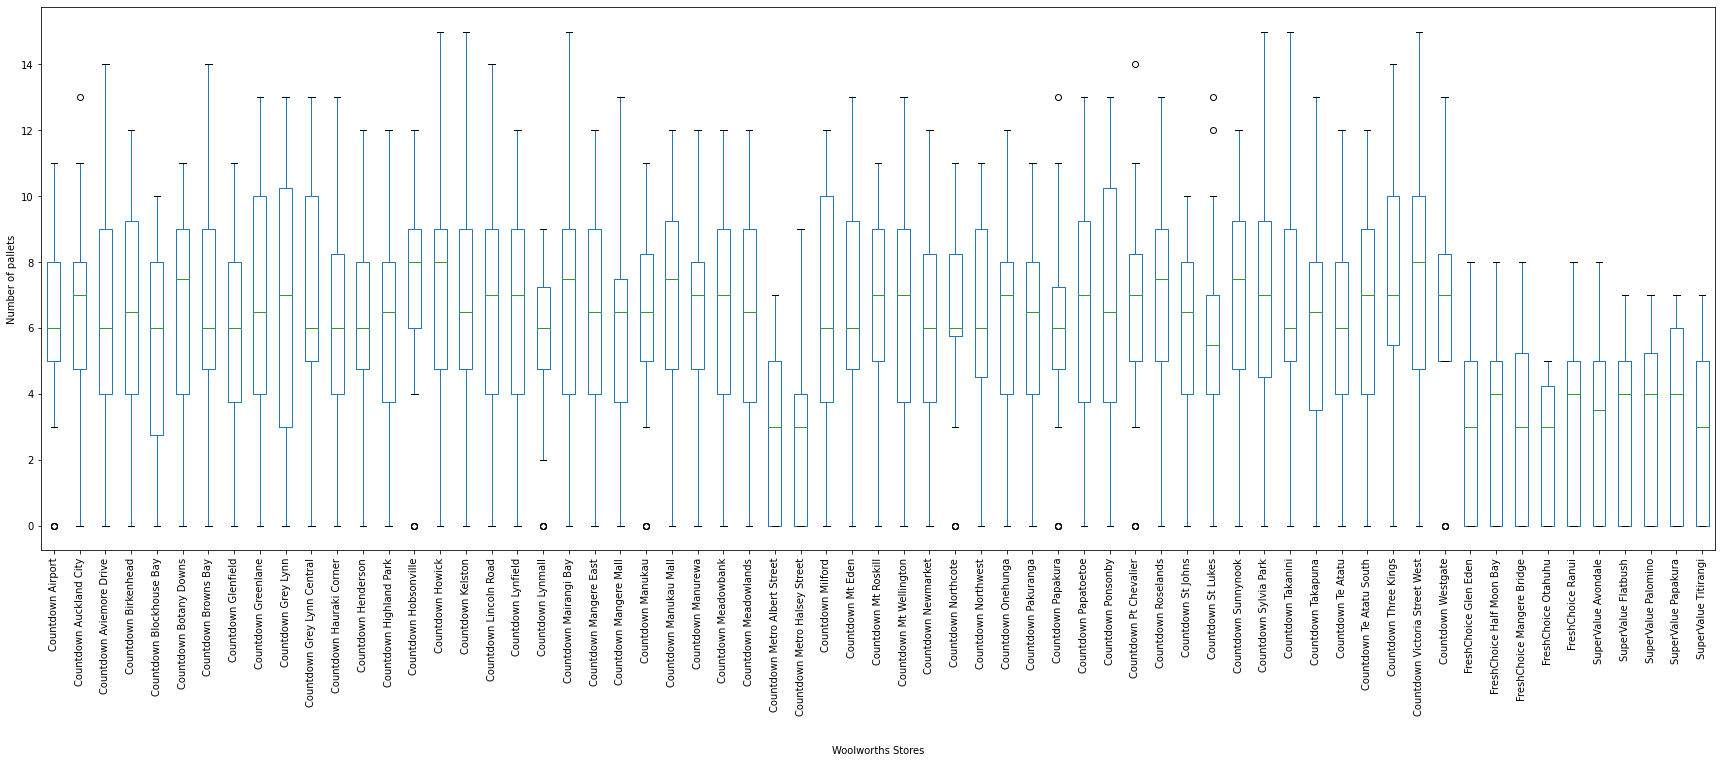

In [23]:
#Plotting a box a whisker plot showing the demand for each Woolworths store
demands_df.T.plot(kind='box', figsize=(30,10), rot=90, ylabel='Number of pallets')
plt.xlabel(xlabel='Woolworths Stores', labelpad=30)
plt.show()

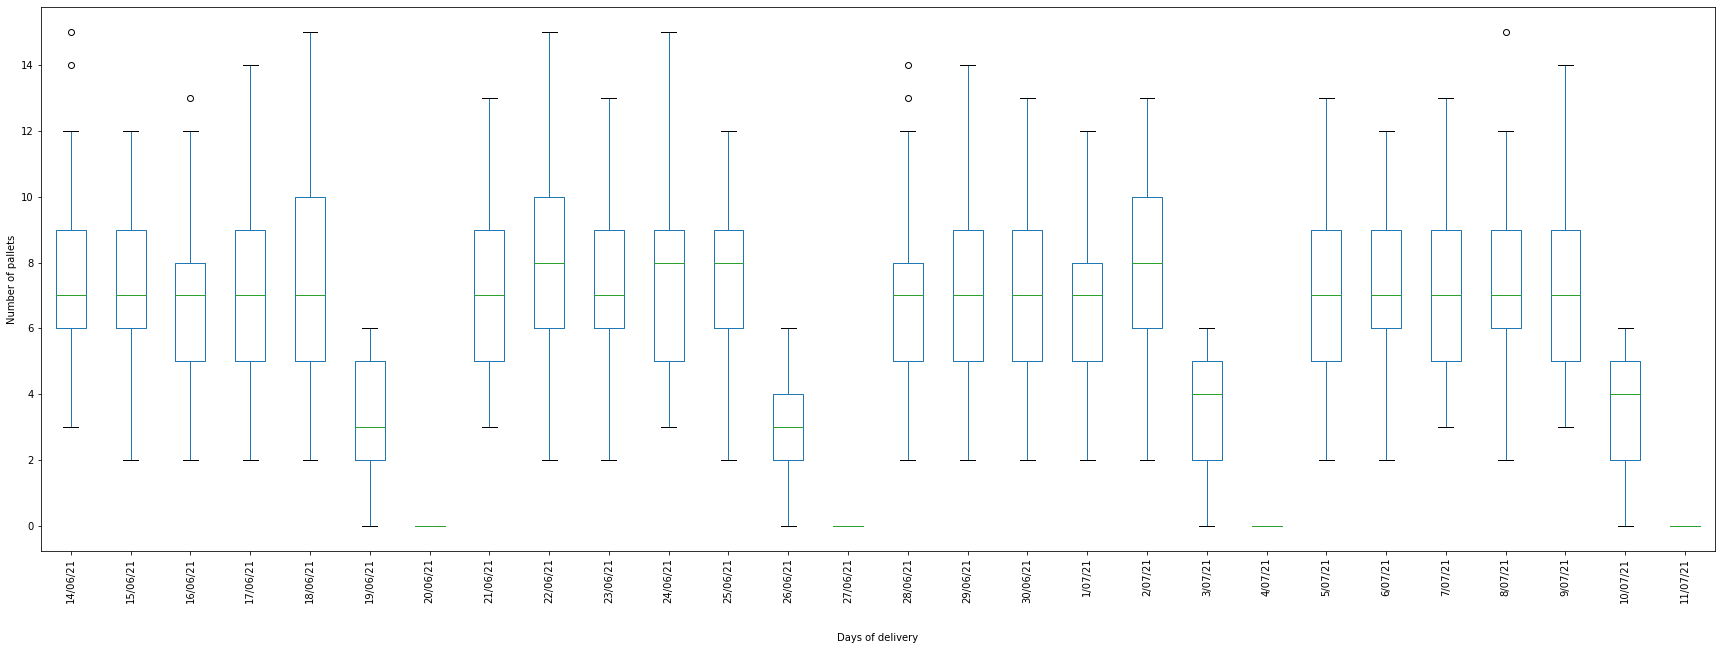

In [24]:
#Plotting a box a whisker plot showing the demand for each day
demands_df.plot(kind='box', figsize=(30,10), rot=90, ylabel='Number of pallets')
plt.xlabel('Days of delivery', labelpad=30)
plt.show()

In [25]:
### Run the code on the botton only if you HAVE to
### Takes around 8 mins to run!

### sns.pairplot(demands_df)

In [26]:
# Finding the median number of pallets for each store (except the Distribution Centre)
median_df = pd.DataFrame(demands_df.iloc[:,0:demands_df.shape[1]].median(axis=1), columns=['Median Pallets'], index=demands_df.index.values)
median_df

,Median Pallets
Countdown Airport,6.0
Countdown Auckland City,7.0
Countdown Aviemore Drive,6.0
Countdown Birkenhead,6.5
Countdown Blockhouse Bay,6.0
...,...
SuperValue Avondale,3.5
SuperValue Flatbush,4.0
SuperValue Palomino,4.0
SuperValue Papakura,4.0


In [27]:
# Finding the median for each day
median_days_df = demands_df.T

In [28]:
# Converting the dates from string to datetime
weekdays = pd.Series([pd.to_datetime(date) for date in median_days_df.index.values]).dt.day_name().values
weekdays

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Sunday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Wednesday',
       'Saturday', 'Tuesday', 'Thursday', 'Sunday'], dtype=object)

In [29]:
# Applying the dates to the dataframe
median_days_df['Weekday'] =  weekdays
median_days_df.head()

Store,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,...,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi,Weekday
14/06/21,5,6,9,9,6,9,14,8,10,11,...,3,7,4,3,3,6,4,4,3,Monday
15/06/21,6,8,9,4,8,11,11,4,10,9,...,5,5,2,5,2,7,2,6,3,Tuesday
16/06/21,10,5,8,8,7,7,6,8,13,9,...,6,3,5,3,6,4,2,4,4,Wednesday
17/06/21,11,8,7,10,6,11,8,3,7,7,...,2,2,5,7,6,3,6,5,3,Thursday
18/06/21,7,8,14,7,6,9,14,4,9,5,...,4,5,5,5,4,5,3,5,4,Friday


In [30]:
# Finding the number of pallets required at each store on each day
median_days_df = median_days_df.groupby(pd.Grouper(key='Weekday', axis=0)).median()
median_days_df = pd.read_csv('median.csv')


Store,Countdown Airport,Countdown Auckland City,Countdown Aviemore Drive,Countdown Birkenhead,Countdown Blockhouse Bay,Countdown Botany Downs,Countdown Browns Bay,Countdown Glenfield,Countdown Greenlane,Countdown Grey Lynn,...,FreshChoice Glen Eden,FreshChoice Half Moon Bay,FreshChoice Mangere Bridge,FreshChoice Otahuhu,FreshChoice Ranui,SuperValue Avondale,SuperValue Flatbush,SuperValue Palomino,SuperValue Papakura,SuperValue Titirangi
Weekday,,,,,,,,,,,,,,,,,,,,,
Monday,6.0,6.5,8.5,8.0,7.0,7.5,8.0,8.5,7.0,7.5,...,5.0,3.5,5.5,4.0,3.5,3.5,5.0,5.5,5.0,3.5
Tuesday,7.5,8.0,9.0,5.5,5.5,7.5,7.0,6.0,11.0,9.0,...,4.0,4.0,4.0,2.0,4.0,5.0,5.5,5.0,5.0,4.5
Wednesday,5.0,7.0,6.0,8.0,7.0,8.0,6.0,8.0,8.0,10.0,...,3.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4.0
Thursday,7.0,9.0,4.0,10.0,7.5,8.5,7.5,4.0,6.0,6.0,...,2.5,3.0,2.0,2.5,5.0,4.0,3.0,5.0,3.5,3.0
Friday,7.0,8.0,7.0,9.0,8.0,9.0,9.0,7.0,9.0,11.0,...,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0
Saturday,5.0,4.0,4.0,4.0,2.0,4.0,4.0,6.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Testing the dataframe
median_days_df.iloc[0, :]

Store
Countdown Airport           6.0
Countdown Auckland City     6.5
Countdown Aviemore Drive    8.5
Countdown Birkenhead        8.0
Countdown Blockhouse Bay    7.0
                           ... 
SuperValue Avondale         3.5
SuperValue Flatbush         5.0
SuperValue Palomino         5.5
SuperValue Papakura         5.0
SuperValue Titirangi        3.5
Name: Monday, Length: 65, dtype: float64

# Creating a map of woolworths store locations

########################
# Setting up our nodes #
########################

coords = locations_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coords = coords.to_numpy().tolist() # Make the arrays into a list of lists.
# Folium, however, requires Lat, Long arrays - so a reversal is needed.
# coords[0] is the warehouse
m = folium.Map(location = list(reversed(coords[2])), zoom_start=10)

folium.Marker(list(reversed(coords[0])), popup = locations_df.index.values[0], icon = folium.Icon(color = 'green')).add_to(m)
for i in range(1, len(coords)):
  if locations_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locations_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locations_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locations_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locations_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coords[i])), popup = locations_df.index.values[i], icon = folium.Icon(color = iconCol)).add_to(m)



In [32]:
########################
# Setting up our nodes #
########################

coords = locations_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coords = coords.to_numpy().tolist() # Make the arrays into a list of lists.
# Folium, however, requires Lat, Long arrays - so a reversal is needed.
# coords[0] is the warehouse
m = folium.Map(location = list(reversed(coords[2])), zoom_start=10)

folium.Marker(list(reversed(coords[0])), popup = locations_df.index.values[0], icon = folium.Icon(color = 'green')).add_to(m)
for i in range(1, len(coords)):
  if locations_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locations_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locations_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locations_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locations_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coords[i])), popup = locations_df.index.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [33]:
########################
# Setting up our nodes #
########################

coordsNorth = locationsNorth_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsNorth = coordsNorth.to_numpy().tolist() # Make the arrays into a list of lists.

coordsEast = locationsEast_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsEast = coordsEast.to_numpy().tolist() # Make the arrays into a list of lists.

coordsWest = locationsWest_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsWest = coordsWest.to_numpy().tolist() # Make the arrays into a list of lists.

coordsCentralNorth = locationsCentralNorth_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsCentralNorth = coordsCentralNorth.to_numpy().tolist() # Make the arrays into a list of lists.

coordsCentralSouth = locationsCentralSouth_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsCentralSouth = coordsCentralSouth.to_numpy().tolist() # Make the arrays into a list of lists.

coordsSouth = locationsSouth_df[['Long', 'Lat']] # Mapping packages work with Long, Lat arrays
coordsSouth = coordsSouth.to_numpy().tolist() # Make the arrays into a list of lists.

# Folium, however, requires Lat, Long arrays - so a reversal is needed.
# coords[0] is the warehouse
m = folium.Map(location = list(reversed(coords[2])), zoom_start=10)

folium.Marker(list(reversed(coordsNorth[0])), popup = locationsNorth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsNorth)):
  iconCol = "red"
  folium.Marker(list(reversed(coordsNorth[i])), popup = locationsNorth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

folium.Marker(list(reversed(coordsEast[0])), popup = locationsEast_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsEast)):
  iconCol = "lightgray"
  folium.Marker(list(reversed(coordsEast[i])), popup = locationsEast_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

folium.Marker(list(reversed(coordsWest[0])), popup = locationsWest_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsWest)):
  iconCol = "green"
  folium.Marker(list(reversed(coordsWest[i])), popup = locationsWest_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

folium.Marker(list(reversed(coordsCentralNorth[0])), popup = locationsCentralNorth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsCentralNorth)):
  iconCol = "blue"
  folium.Marker(list(reversed(coordsCentralNorth[i])), popup = locationsCentralNorth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

folium.Marker(list(reversed(coordsCentralSouth[0])), popup = locationsCentralSouth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsCentralSouth)):
  iconCol = "orange"
  folium.Marker(list(reversed(coordsCentralSouth[i])), popup = locationsCentralSouth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

folium.Marker(list(reversed(coordsSouth[0])), popup = locationsSouth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsSouth)):
  iconCol = "darkpurple"
  folium.Marker(list(reversed(coordsSouth[i])), popup = locationsSouth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [34]:
#########################
# Nodes for region East #
#########################

m = folium.Map(location = list(reversed(coordsNorth[2])), zoom_start=10)

folium.Marker(list(reversed(coordsNorth[0])), popup = locationsNorth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsNorth)):
  if locationsNorth_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsNorth_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsNorth_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsNorth_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  if locationsNorth_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsNorth_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsNorth[i])), popup = locationsNorth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [35]:
#########################
# Nodes for region East #
#########################

m = folium.Map(location = list(reversed(coordsEast[2])), zoom_start=10)

folium.Marker(list(reversed(coordsEast[0])), popup = locationsEast_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsEast)):
  if locationsEast_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsEast_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsEast_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsEast_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  if locationsEast_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsEast_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsEast[i])), popup = locationsEast_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [36]:
#########################
# Nodes for region West #
#########################

m = folium.Map(location = list(reversed(coordsWest[2])), zoom_start=10)

folium.Marker(list(reversed(coordsWest[0])), popup = locationsWest_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsWest)):
  if locationsWest_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsWest_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsWest_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsWest_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locationsWest_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsWest[i])), popup = locationsWest_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [37]:
##################################
# Nodes for region Central North #
##################################

m = folium.Map(location = list(reversed(coordsCentralNorth[2])), zoom_start=10)

folium.Marker(list(reversed(coordsCentralNorth[0])), popup = locationsCentralNorth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsCentralNorth)):
  if locationsCentralNorth_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsCentralNorth_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsCentralNorth_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsCentralNorth_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locationsCentralNorth_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsCentralNorth[i])), popup = locationsCentralNorth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [38]:
##################################
# Nodes for region Central South #
##################################

m = folium.Map(location = list(reversed(coords[2])), zoom_start=10)

folium.Marker(list(reversed(coordsCentralSouth[0])), popup = locationsCentralSouth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsCentralSouth)):
  if locationsCentralSouth_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsCentralSouth_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsCentralSouth_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsCentralSouth_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locationsCentralSouth_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsCentralSouth[i])), popup = locationsCentralSouth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [39]:
###########################
# Nodes for region South #
##########################

m = folium.Map(location = list(reversed(coordsSouth[2])), zoom_start=10)

folium.Marker(list(reversed(coordsSouth[0])), popup = locationsSouth_df.Store.values[0], icon = folium.Icon(color = 'black')).add_to(m)
for i in range(1, len(coordsSouth)):
  if locationsSouth_df.Type[i] == "Countdown":
    iconCol = "green"
  elif locationsSouth_df.Type[i] == "FreshChoice":
    iconCol = "blue"
  elif locationsSouth_df.Type[i] == "SuperValue":
    iconCol = "red"
  elif locationsSouth_df.Type[i] == "Countdown Metro":
    iconCol = "orange"
  elif locationsSouth_df.Type[i] == "Distribution Centre":
    iconCol = "black"
  folium.Marker(list(reversed(coordsSouth[i])), popup = locationsSouth_df.Store.values[i], icon = folium.Icon(color = iconCol)).add_to(m)

m

In [40]:
# Importing API key
from dotenv import load_dotenv

load_dotenv()

True

In [41]:
import os
API_KEY = os.getenv("API_KEY")

In [42]:
import openrouteservice as ors

# Boot up client to OpenRouteService. ORSkey is your own key as a string.
client = ors.Client(key=f"{API_KEY}")
route = client.directions(
  coordinates = [coords[55], coords[21]], # Distribution Centre to Countdown Mangere East
  # We can have more than two coords - it will generate a path between those coords in order.
  profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.
  format='geojson',
  validate = False
  )


In [43]:
# Get distance in meters
route['features'][0]['properties']['summary']['distance']

4351.9

In [44]:
# Get duration in seconds
route['features'][0]['properties']['summary']['duration']

428.1

In [45]:
m = folium.Map(location = [-36.95770671222872, 174.81407132219618], zoom_start=15)
folium.PolyLine(locations = [list(reversed(coord))
for coord in
route['features'][0]['geometry']['coordinates']]).add_to(m)
m

In [46]:
#pip install --upgrade --user ortools

#route generation psuedo code
# loop through one truck at a time
#truck goes to the nearest node
# set node as visited 
# remove demand from number of palletes in truck
# goes through the scenario of 5 nearest stores 
# continue until truck demand cannot fulfill store demand 
# go back to warehouse 
## NOTE only one node will go to unvisited in each loop
# next truck to go to the closest unvisited node
# repeat until all visited 
#


In [47]:
locationsNorth_df


,Type,Location,Store,Lat,Long,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Countdown,Birkenhead,Countdown Birkenhead,-36.811118,174.724878,8.0,5.5,9.0,10.0,9.0,4.5,0
1,Countdown,Northcote,Countdown Northcote,-36.800352,174.745534,7.0,6.0,6.0,7.0,9.5,4.5,0
2,Countdown,Hauraki Corner,Countdown Hauraki Corner,-36.796680,174.778125,8.0,7.0,8.5,6.0,7.5,4.5,0
3,Countdown,Takapuna,Countdown Takapuna,-36.791254,174.766206,8.0,6.5,7.0,7.5,9.0,2.0,0
4,Countdown,Glenfield,Countdown Glenfield,-36.781488,174.723426,8.5,7.0,9.0,6.0,5.5,4.5,0
5,Countdown,Milford,Countdown Milford,-36.771972,174.766618,8.0,7.0,10.5,6.0,8.0,3.0,0
6,Countdown,Sunnynook,Countdown Sunnynook,-36.759070,174.740694,8.5,9.5,8.5,7.0,9.5,3.0,0
7,Countdown,Mairangi Bay,Countdown Mairangi Bay,-36.739413,174.754055,8.0,7.0,8.5,10.5,9.5,3.5,0
8,Countdown,Browns Bay,Countdown Browns Bay,-36.717145,174.747277,9.5,5.0,6.5,7.5,10.5,4.5,0


In [48]:
# Picked North

# For each truck (Covers first 3 locations)
# Loop through the locations
# From each location, pick closest 3 neighbouring locations
# Keep looping till all the nodes are covered
routes_monday_north = []
for i in range(locationsNorth_df['Monday'].shape[0] - 1):
    route = client.directions(
    coordinates = [coordsNorth[0], coordsNorth[i+1]],  
    profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.
    format='geojson',
    validate = False
    )
    routes_monday_north.append(route)

routes_monday_north
''''
m = folium.Map(location = [-36.95770671222872, 174.81407132219618], zoom_start=15)
for route in routes_monday_north:
    folium.PolyLine(locations = [list(reversed(coordsNorth))
    for coordsNorth in route['features'][0]['geometry']['coordinates']]).add_to(m)
m
'''

"'\nm = folium.Map(location = [-36.95770671222872, 174.81407132219618], zoom_start=15)\nfor route in routes_monday_north:\n    folium.PolyLine(locations = [list(reversed(coordsNorth))\n    for coordsNorth in route['features'][0]['geometry']['coordinates']]).add_to(m)\nm\n"

In [49]:
num = 0
for i in range(locationsNorth_df['Monday'].shape[0] - 1):
    num+= 1
num

8

In [50]:

#for i in (locationsSouth_df.Store):
 #   locationsSouth_df.Store[i]

#locationsSouth_df.Store

routes_monday_north = []
for i in range(locationsNorth_df['Monday'].shape[0] - 1):
  for j in range(locationsNorth_df['Monday'].shape[0] - 1):
    if i != j:
      route = client.directions(
      coordinates = [coordsNorth[0], coordsNorth[i+1], coordsNorth[j+1]],  
      profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.
      format='geojson',
      validate = False
      )
      routes_monday_north.append(route)
      route
    
'''
route = []

route1 = client.directions(
  coordinates = [coordsSouth[0], coordsSouth[1]],  # Distribution Centre to Countdown Mangere East
  # We can have more than two coords - it will generate a path between those coords in order.
  profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.
  format='geojson',
  validate = False
  )
route.append(route1)

route2 = client.directions(
  coordinates = [coordsNorth[0], coordsNorth[5]],  # Distribution Centre to Countdown Mangere East
  # We can have more than two coords - it will generate a path between those coords in order.
  profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.
  format='geojson',
  validate = False
  )

route.append(route2)

route
'''

/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 4th time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 5th time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 6th time.
/Users/benjaminhall/opt/anaconda3/lib/python3.8/site-packages/openrout

"\nroute = []\n\nroute1 = client.directions(\n  coordinates = [coordsSouth[0], coordsSouth[1]],  # Distribution Centre to Countdown Mangere East\n  # We can have more than two coords - it will generate a path between those coords in order.\n  profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.\n  format='geojson',\n  validate = False\n  )\nroute.append(route1)\n\nroute2 = client.directions(\n  coordinates = [coordsNorth[0], coordsNorth[5]],  # Distribution Centre to Countdown Mangere East\n  # We can have more than two coords - it will generate a path between those coords in order.\n  profile = 'driving-hgv', # can be driving-car, driving-hgv, etc.\n  format='geojson',\n  validate = False\n  )\n\nroute.append(route2)\n\nroute\n"

In [51]:
# Get distance in meters
routes_monday_north[8]['features'][0]['properties']['summary']['distance']

8258.2

In [52]:
# Get duration in seconds
route[1]['features'][0]['properties']['summary']['duration']

KeyError: 1

In [ ]:
m = folium.Map(location = [-36.95770671222872, 174.81407132219618], zoom_start=15)


for i in range(locationsNorth_df['Monday'].shape[0] - 1):
    folium.PolyLine(locations = [list(reversed(coordsSouth))
    for coordsSouth in
    routes_monday_north[i]['features'][0]['geometry']['coordinates']]).add_to(m)

folium.CircleMarker([locationsNorth_df['Lat'][0], locationsNorth_df['Long'][0]],
                    radius=15,
                    fill_color="#3db7e4", # divvy color
                    ).add_to(m)

folium.CircleMarker([locationsNorth_df['Lat'][5], locationsNorth_df['Long'][5]],
                    radius=15,
                    fill_color="#3db7e4", # divvy color
                    ).add_to(m)


m

In [ ]:
routes_monday_north

[{'type': 'FeatureCollection',
  'features': [{'bbox': [174.72512, -36.949558, 174.852835, -36.81097],
    'type': 'Feature',
    'properties': {'segments': [{'distance': 26303.3,
       'duration': 2177.2,
       'steps': [{'distance': 138.3,
         'duration': 33.2,
         'type': 11,
         'instruction': 'Head east',
         'name': '-',
         'way_points': [0, 4]},
        {'distance': 28.7,
         'duration': 6.9,
         'type': 1,
         'instruction': 'Turn right',
         'name': '-',
         'way_points': [4, 5]},
        {'distance': 278.6,
         'duration': 26.7,
         'type': 0,
         'instruction': 'Turn left onto Favona Road',
         'name': 'Favona Road',
         'way_points': [5, 10]},
        {'distance': 1525.2,
         'duration': 168.9,
         'type': 13,
         'instruction': 'Keep right onto Favona Road',
         'name': 'Favona Road',
         'way_points': [10, 42]},
        {'distance': 64.2,
         'duration': 9.2,
      